# Abstract

Feature selection is one of the processes to reduce the dimensions of data. Dimension reduction aims to improve the performance of machine learning algorithm models. This study shows which feature selection method is the best for improving the performance of the Support Vector Machine (SVM) algorithm. SVM is used to predict employee turnover based on the given datasets. Evaluation matrices such as accuracy, recall, precision, dan f1-score are used to assess the final performance of SVM.

# Dataset

The data used is the original dataset shared by Edward Babushkin's blog. The dataset has a total of 16 features and 1129 different employee data rows of different employees.

Edward Babushkin's blog: https://edwvb.blogspot.com/2017/10/employee-turnover-how-to-predict-individual-risks-of-quitting.html


Dataset resource: https://www.kaggle.com/datasets/davinwijaya/employee-turnover

In [1]:
# download dataset
!gdown --id 1JfkeWsbRO-DzRWmW1CCEuzDoHGySrTjc

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JfkeWsbRO-DzRWmW1CCEuzDoHGySrTjc
To: /content/turnover.csv
100% 83.2k/83.2k [00:00<00:00, 89.8MB/s]


# Methods

## Import Libraries

This section will show what libraries were used during the development of the program.

In [2]:
# basic libraries
import numpy as np
import pandas as pd

In [3]:
# libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
# libraries for machine learning models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
# supporting libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
# evaluation metrics library
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [7]:
# libraries for feature selection
%pip install mlxtend --upgrade

import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
sns.set_theme(style='whitegrid')
warnings.filterwarnings('ignore')

## Data Preprocessing

Data preprocessing aims to explore and clean the dataset before it can be used in machine learning models. This section includes dataset exploration, category feature encoding, visualization of data distribution and correlation, and data scaling.

### Data Exploration

In this section, dataset exploration will display the size of the dataset, comparison of dependent variables, feature exploration, and checking for empty values in the data.

In [9]:
# data frame initiation
df_EB = pd.read_csv('turnover.csv', encoding="ISO-8859-1")

In [10]:
# top five data sample
df_EB.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [11]:
# show the size of dataset
df_EB.shape

(1129, 16)

In [12]:
# exploration of the number of employee turnover (dependent variable)
df_EB.groupby('event').count().max(axis=1)

event
0    558
1    571
dtype: int64

In [13]:
# the number of employee based on job type
df_EB.groupby('industry').count().max(axis=1)

industry
 HoReCa             11
Agriculture         15
Banks              114
Building            41
Consult             74
IT                 122
Mining              24
Pharma              20
PowerGeneration     38
RealEstate          13
Retail             289
State               55
Telecom             36
etc                 94
manufacture        145
transport           38
dtype: int64

In [14]:
# show information for each features
df_EB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


### Category Feature Encoding

This process will change the categorical data type, which is still in the form of string characters, to be converted to numeric using label encoder so each value in the column can be read by the machine learning algorithm.

In the dataset, category features includes gender, industry, profession, traffic, coach, head_gender, greywage, and way.

In [15]:
# initiates a column with category type
cat_column = ['gender','industry','profession','traffic','coach','head_gender','greywage','way']

# change the category type column using Label Encoding
df_EB[cat_column] = df_EB[cat_column].apply(LabelEncoder().fit_transform)

df_EB

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,1,35.0,2,6,4,1,0,1,0,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,1,33.0,2,6,2,1,1,1,0,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,0,35.0,8,6,4,1,1,1,0,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,0,35.0,8,6,4,1,1,1,0,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,1,32.0,10,2,7,2,0,1,0,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,0,41.0,2,6,4,0,1,1,0,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,0,41.0,2,6,4,0,1,1,0,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,0,34.0,12,0,0,1,0,1,0,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,0,51.0,4,6,2,1,1,0,0,3.8,7.6,5.7,6.3,5.2


### Visualization of Data Distribution and Correlation

This section displays the distribution of data values in each column and calculates the correlation between columns.

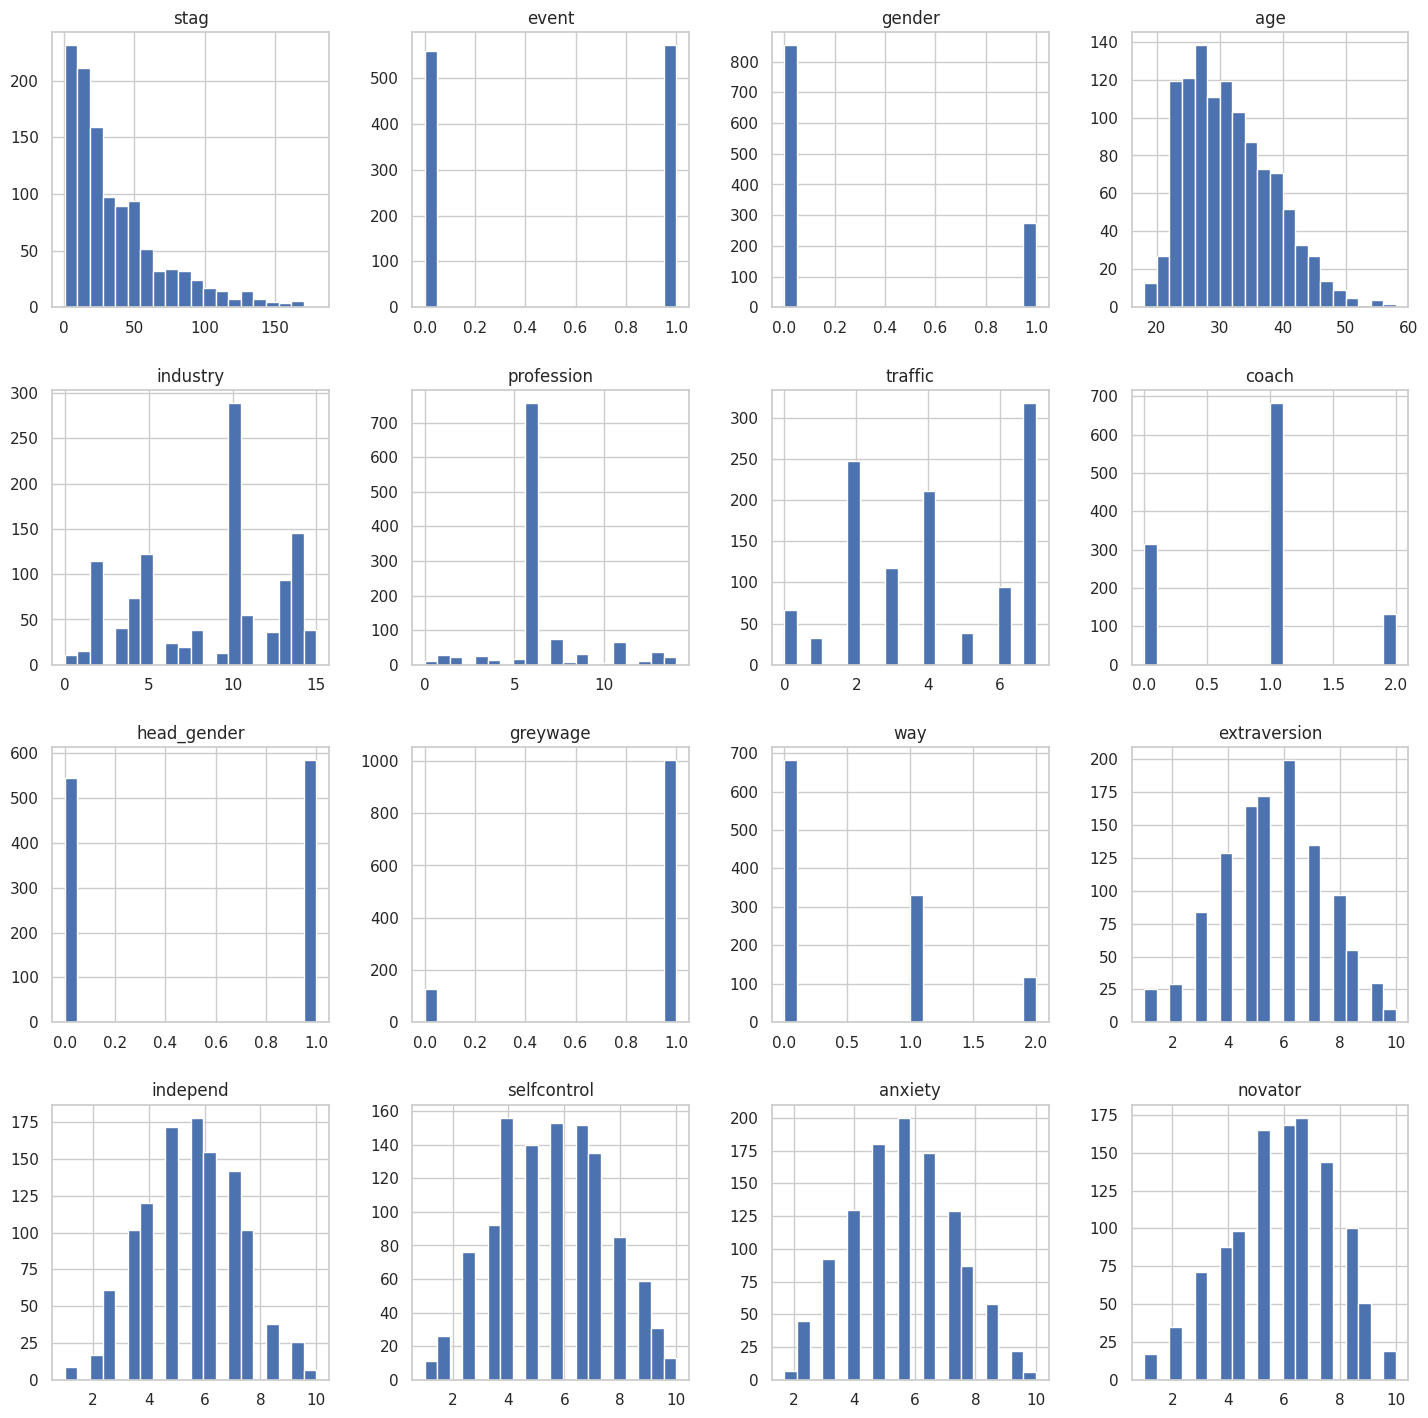

In [16]:
# show data distribution in each column
_ = df_EB.hist(figsize=(17.5, 17.5), bins=20)

<Axes: >

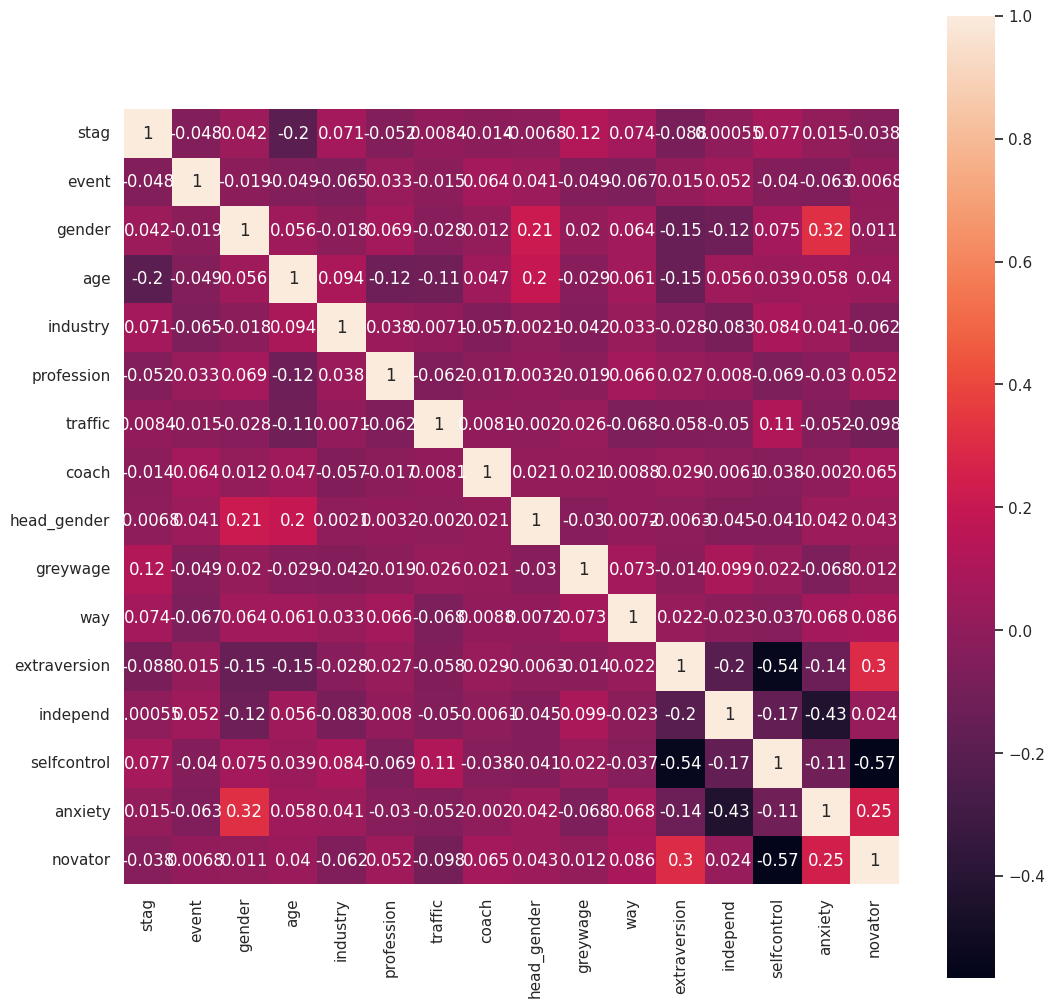

In [17]:
plt.figure(figsize=(12.5, 12.5))

# display correlation between columns
sns.heatmap(df_EB.corr(), square=True, annot=True)

### Data Scaling

This data scaling stage serves to equalize the value range of each column. The scaling technique used in this study is the Standard Scaller scaling technique.

In [18]:
# take all of the independent variable in dataset
X = df_EB.drop(['event'], axis=1)

# take the dependent variable in dataset
y = df_EB['event']

In [19]:
# stores the name of all column in independent variable
cols = X.columns

In [20]:
# initiate the library for scaling
scaler = StandardScaler()

# scaling data for independent variable
X = scaler.fit_transform(X)

In [21]:
# convert into data frame
X = pd.DataFrame(X, columns=[cols])

X.describe()

,stag,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
count,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03,1.129000e+03
mean,-1.195776e-16,-6.293558e-17,2.391552e-16,1.069905e-16,1.132840e-16,1.762196e-16,7.866948e-17,-7.552270e-17,1.762196e-16,-1.219377e-16,1.172175e-16,-1.321647e-16,-9.597676e-17,-4.090813e-17,-2.863569e-16
std,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00,1.000443e+00
min,-1.063136e+00,-5.688268e-01,-1.868565e+00,-2.036053e+00,-2.610645e+00,-1.855951e+00,-1.380739e+00,-1.035162e+00,-2.808872e+00,-7.400678e-01,-2.481274e+00,-2.630180e+00,-2.322756e+00,-2.321230e+00,-2.563944e+00
25%,-7.305599e-01,-5.688268e-01,-7.245717e-01,-8.543218e-01,-2.231049e-01,-9.677066e-01,-1.380739e+00,-1.035162e+00,3.560148e-01,-7.400678e-01,-5.361864e-01,-8.093903e-01,-7.564856e-01,-5.066868e-01,-7.774535e-01
50%,-3.603879e-01,-5.688268e-01,-1.525750e-01,3.274098e-01,-2.231049e-01,-7.946209e-02,2.653586e-01,9.660327e-01,3.560148e-01,-7.400678e-01,-1.039447e-01,1.290197e-02,5.191217e-02,-3.841757e-02,6.324809e-02
75%,4.310477e-01,-5.688268e-01,7.054199e-01,8.001024e-01,-2.231049e-01,1.252905e+00,2.653586e-01,9.660327e-01,3.560148e-01,7.387580e-01,7.605385e-01,8.351942e-01,8.097851e-01,8.395873e-01,8.514058e-01
max,4.190608e+00,1.758004e+00,3.851401e+00,1.509141e+00,2.960281e+00,1.252905e+00,1.911456e+00,9.660327e-01,3.560148e-01,2.217584e+00,2.381445e+00,2.655984e+00,2.224481e+00,2.537063e+00,2.165002e+00


In [22]:
# returns the scaling result into the dataset
df_EB[cols] = X
df_EB['event'] = y

df_EB

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,-0.868410,1,1.758004,0.562421,-1.563361,-0.223105,-0.079462,0.265359,-1.035162,0.356015,-0.740068,0.328297,-0.809390,0.051912,0.839587,1.271757
1,-0.400875,1,1.758004,0.276422,-1.563361,-0.223105,-0.967707,0.265359,0.966033,0.356015,-0.740068,0.328297,-0.809390,0.051912,0.839587,1.271757
2,-0.607169,1,-0.568827,0.562421,-0.145283,-0.223105,-0.079462,0.265359,0.966033,0.356015,-0.740068,0.328297,0.424048,-1.514359,-0.506687,1.271757
3,-0.607169,1,-0.568827,0.562421,-0.145283,-0.223105,-0.079462,0.265359,0.966033,0.356015,-0.740068,-0.103945,1.246340,-0.352287,-1.852961,0.431055
4,-0.827923,1,1.758004,0.133423,0.327410,-1.814798,1.252905,1.911456,-1.035162,0.356015,-0.740068,-1.400670,-0.809390,1.213984,0.839587,-1.145260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,-0.763336,0,-0.568827,1.420416,-1.563361,-0.223105,-0.079462,-1.380739,0.966033,0.356015,-0.740068,1.625022,-1.220536,-1.514359,-0.506687,1.271757
1125,-0.763336,0,-0.568827,1.420416,-1.563361,-0.223105,-0.079462,-1.380739,0.966033,0.356015,-0.740068,1.625022,-1.220536,-1.514359,-0.506687,1.271757
1126,2.411083,0,-0.568827,0.419422,0.800102,-2.610645,-1.855951,0.265359,-1.035162,0.356015,-0.740068,-0.536186,0.012902,0.809785,0.371318,-1.145260
1127,0.375136,0,-0.568827,2.850407,-1.090668,-0.223105,-0.967707,0.265359,0.966033,-2.808872,-0.740068,-0.968428,1.246340,0.051912,0.371318,-0.357103


## Feture Selection

At this stage, the dataset will be divided into several categories. The first category is the dataset without using feature selection. The next category is a dataset that has been processed by feature selection.

The feature selection methods used are filter method, wrapper method, and embedded method. method, and embedded method.

In [23]:
# divide the dataset into four categories
df_norm = df_EB.copy()          # dataset without feature selection
df_filt = df_EB.copy()          # dataset using filter method
df_wrap = df_EB.copy()          # dataset using wrapper method
df_embd = df_EB.copy()          # dataset using embedded method

### Filter Method

Filter methods are methods for selecting features by sorting the level of feature relationships with class labels in the dataset.

In [24]:
# take all correlation score for each feature
corr_value = df_EB.corr().unstack().sort_values(ascending=False)

# convert into data frame
corr_value = pd.DataFrame(corr_value).reset_index()

# change the columns name
corr_value.columns = ['col1','col2','value correlation']

# change the correlation value into its absolute form
corr_value['value correlation'] = corr_value['value correlation'].abs()

# sort based on correlation value
corr_value.sort_values

corr_value

,col1,col2,value correlation
0,stag,stag,1.000000
1,event,event,1.000000
2,anxiety,anxiety,1.000000
3,selfcontrol,selfcontrol,1.000000
4,independ,independ,1.000000
...,...,...,...
251,independ,anxiety,0.427209
252,selfcontrol,extraversion,0.538039
253,extraversion,selfcontrol,0.538039
254,novator,selfcontrol,0.565972


In [25]:
# selecting the independent variable value correlation
corr_target = corr_value.query("col1 == 'event' & col2 != 'event'")

# sort based on correlation value
corr_target.sort_values(by=['value correlation'], ascending=False)

,col1,col2,value correlation
216,event,way,0.067470
215,event,industry,0.064898
56,event,coach,0.064296
212,event,anxiety,0.063232
71,event,independ,0.051864
196,event,greywage,0.049166
195,event,age,0.048751
192,event,stag,0.048361
80,event,head_gender,0.041259
185,event,selfcontrol,0.040040


In [26]:
# filtering the feature by specific value
select_column = corr_target['col2'].loc[corr_value['value correlation'] > 0.05]

select_column

56        coach
71     independ
212     anxiety
215    industry
216         way
Name: col2, dtype: object

In [27]:
# apply to the data frame
df_filt = df_filt[select_column]

df_filt.head()

,coach,independ,anxiety,industry,way
0,0.265359,-0.809390,0.839587,-1.563361,-0.740068
1,0.265359,-0.809390,0.839587,-1.563361,-0.740068
2,0.265359,0.424048,-0.506687,-0.145283,-0.740068
3,0.265359,1.246340,-1.852961,-0.145283,-0.740068
4,1.911456,-0.809390,0.839587,0.327410,-0.740068


### Wrapper Method

Wrapper methods are methods that select features by evaluating the performance of
model for each feature in the dataset. An example of an algorithm that can be used is sequential floating forward
selection (SFFS).

In [28]:
# separating dependent variable data from independent variables
X = df_wrap.drop(['event'], axis=1)
y = df_wrap['event']

In [29]:
# feature selection initiation using sequential forward selection
sfs1 = SFS(SVC(), 
           k_features=10, 
           forward=True, 
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(np.array(X), y)

In [30]:
# selected feature index
sfs1.k_feature_idx_

(0, 1, 2, 3, 4, 7, 8, 9, 11, 13)

In [31]:
# get the feature name by index
select_column = X.columns[list(sfs1.k_feature_idx_)]

In [32]:
# apply to the dataframe
df_wrap = df_wrap[select_column]

df_wrap.head()

,stag,gender,age,industry,profession,head_gender,greywage,way,independ,anxiety
0,-0.868410,1.758004,0.562421,-1.563361,-0.223105,-1.035162,0.356015,-0.740068,-0.809390,0.839587
1,-0.400875,1.758004,0.276422,-1.563361,-0.223105,0.966033,0.356015,-0.740068,-0.809390,0.839587
2,-0.607169,-0.568827,0.562421,-0.145283,-0.223105,0.966033,0.356015,-0.740068,0.424048,-0.506687
3,-0.607169,-0.568827,0.562421,-0.145283,-0.223105,0.966033,0.356015,-0.740068,1.246340,-1.852961
4,-0.827923,1.758004,0.133423,0.327410,-1.814798,-1.035162,0.356015,-0.740068,-0.809390,0.839587


### Embedded Method

Embedded methods use an approach by incorporating feature selection as part of
model training.

In [33]:
# initialize the classifier
rf = RandomForestClassifier()

In [34]:
# process learning classifier
rf.fit(X,y)

# taking feature importance after the learning process
importances = rf.feature_importances_
indices = np.argsort(importances)

# displays the feature index
for i in indices:
    print(f'Feature {i} : {importances[i]}')

Feature 8 : 0.013862700746205917
Feature 1 : 0.015795078241002538
Feature 7 : 0.0227181785683619
Feature 6 : 0.03517621213363586
Feature 9 : 0.03567628256658565
Feature 4 : 0.06199262521627554
Feature 5 : 0.06812360493134072
Feature 10 : 0.07086090775584337
Feature 13 : 0.07276066876047901
Feature 12 : 0.07817981106086586
Feature 14 : 0.07992379180893124
Feature 11 : 0.08134219844061909
Feature 3 : 0.1018458108726336
Feature 2 : 0.11467148076278681
Feature 0 : 0.14707064813443313


In [35]:
# selecting features with an importance value more than 0.07
inx_column = [0,2,3,12,11,14,10,13]

In [36]:
# apply to the dataframe
df_embd = df_embd[df_embd.iloc[:,inx_column].columns]

df_embd.head()

,stag,gender,age,independ,extraversion,anxiety,way,selfcontrol
0,-0.868410,1.758004,0.562421,-0.809390,0.328297,0.839587,-0.740068,0.051912
1,-0.400875,1.758004,0.276422,-0.809390,0.328297,0.839587,-0.740068,0.051912
2,-0.607169,-0.568827,0.562421,0.424048,0.328297,-0.506687,-0.740068,-1.514359
3,-0.607169,-0.568827,0.562421,1.246340,-0.103945,-1.852961,-0.740068,-0.352287
4,-0.827923,1.758004,0.133423,-0.809390,-1.400670,0.839587,-0.740068,1.213984


## Support Vector Machine

Support Vector Machine will be used as a machine learning method to test performance in predicting each given dataset. The metric evaluation that used to select the best model is based on accuracy model.

In [37]:
# separation of independent variables with dependent variables
X = df_norm.drop(['event'], axis=1)
y = df_norm['event']

### Without Feature Selection

In [38]:
# split the dataset with a percentage of 80% data train and 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [39]:
# displays the size of the data train and data teset
X_train.shape, X_test.shape

((903, 15), (226, 15))

In [40]:
# initialize SVC
svc=SVC() 

# perform SVC training for data train
svc.fit(X_train,y_train)

# make predictions from the model on the data test
y_pred=svc.predict(X_test)

# evaluates model prediction
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.55      0.56       116
           1       0.55      0.57      0.56       110

    accuracy                           0.56       226
   macro avg       0.56      0.56      0.56       226
weighted avg       0.56      0.56      0.56       226



In [41]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5619


### Filter Method Selection

In [42]:
# split the dataset with a percentage of 80% data train and 20% data test
X_train, X_test, y_train, y_test = train_test_split(df_filt, y, test_size = 0.2, random_state = 0)

In [43]:
# displays the size of the data train and data teset
X_train.shape, X_test.shape

((903, 5), (226, 5))

In [44]:
# initialize SVC
svc=SVC() 

# perform SVC training for data train
svc.fit(X_train,y_train)

# make predictions from the model on the data test
y_pred=svc.predict(X_test)

# evaluates model prediction
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.53      0.55       116
           1       0.54      0.57      0.56       110

    accuracy                           0.55       226
   macro avg       0.55      0.55      0.55       226
weighted avg       0.55      0.55      0.55       226



In [45]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5531


### Wrapper Method Selection

In [46]:
# split the dataset with a percentage of 80% data train and 20% data test
X_train, X_test, y_train, y_test = train_test_split(df_wrap, y, test_size = 0.2, random_state = 0)

In [47]:
# displays the size of the data train and data teset
X_train.shape, X_test.shape

((903, 10), (226, 10))

In [48]:
# initialize SVC
svc=SVC() 

# perform SVC training for data train
svc.fit(X_train,y_train)

# make predictions from the model on the data test
y_pred=svc.predict(X_test)

# evaluates model prediction
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.65      0.62       116
           1       0.59      0.55      0.57       110

    accuracy                           0.60       226
   macro avg       0.60      0.60      0.60       226
weighted avg       0.60      0.60      0.60       226



In [49]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5973


### Embedded Method Selection

In [50]:
# split the dataset with a percentage of 80% data train and 20% data test
X_train, X_test, y_train, y_test = train_test_split(df_embd, y, test_size = 0.2, random_state = 0)

In [51]:
# displays the size of the data train and data teset
X_train.shape, X_test.shape

((903, 8), (226, 8))

In [52]:
# initialize SVC
svc=SVC() 

# perform SVC training for data train
svc.fit(X_train,y_train)

# make predictions from the model on the data test
y_pred=svc.predict(X_test)

# evaluates model prediction
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.48      0.52       116
           1       0.53      0.62      0.57       110

    accuracy                           0.55       226
   macro avg       0.55      0.55      0.55       226
weighted avg       0.55      0.55      0.55       226



In [53]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.5487


# Conclusion

Feature selection performed on the dataset can both increase and decrease the evaluation results obtained depending on the method used.The feature selection method that shows improved evaluation results compared to the evaluation results without feature selection is the wrapper method with evaluation results compared to evaluation results without feature selection is the wrapper method with a model performance value of 0.60. While the other two methods, filter method and embedded method, experienced a decrease in performance with the same performance value of 0.55. This could be due to the different feature selection of the three methods used produce different performance results.